# Исследование данных о продажах компьютерных игр

Имеются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. 

Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для этого проанализируем, какие игровые платформы и жанры самые востребованные, как на предпочтение по играм влияет территориальный признак, проверим некоторые гипотезы. Но предварительно выполним предобработку данных.

### Общая информация 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
    
data.to_csv('data.csv', index=False)

In [3]:
display(data.head(15))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов с двумя типами данных: `float`, `object`. Названия столбцов не соответствуют хорошему стилю (содержат заглавные буквы).

Согласно документации к данным:
* `Name` — название игры;           
* `Platform` — платформа;  
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Значит в данных есть пропущенные значения.

In [4]:
 data.isna().sum() # оценим количество пропусков с помощью комбинации методов

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<Axes: title={'center': 'Year_of_Release'}>,
        <Axes: title={'center': 'NA_sales'}>],
       [<Axes: title={'center': 'EU_sales'}>,
        <Axes: title={'center': 'JP_sales'}>],
       [<Axes: title={'center': 'Other_sales'}>,
        <Axes: title={'center': 'Critic_Score'}>]], dtype=object)

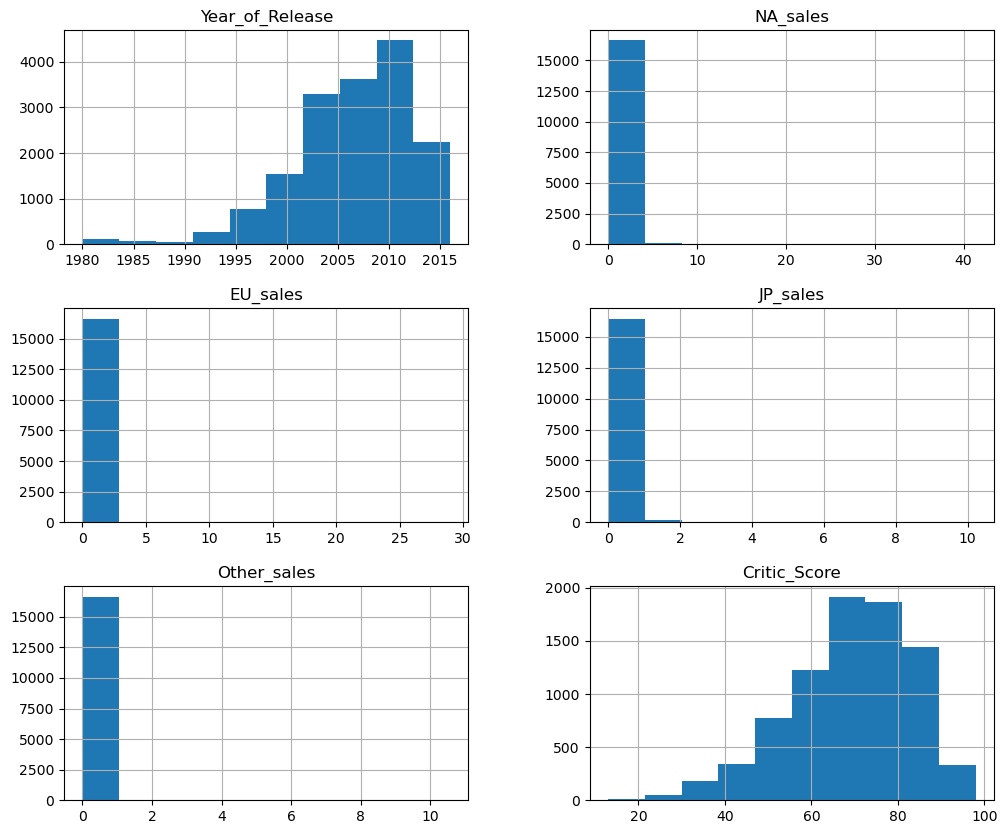

In [6]:
data.hist(figsize=(12, 10))

По гистаграммам и информации, полученной с помощью метода describe(), видно, что год выпуска игр варьируется от 1980 до 2016. При этом большинство игр выпускались в 2003-2009 г. Предварительно можно оценить, что основной рынок продаж - в Северной Америке, затем - в Европе. 

**Выводы**

В каждой строке таблицы — данные о продажах компьютерной игры по разным регионам, а также её рейтинг, как пользователей, так критиков. Предварительно можно утверждать, что данных достаточно для изучения закономерностей, определяющих успешность игры. Но при первой оценке видно, что встречаются пропуски в данных, не соответствующий тип данных. 

Поэтому важно будет устранить проблемы в данных.

### Предобработка данных

#### Замена названий столбцов

In [7]:
# Переводим названия столбцов к нижнему регистру и проверяем результат
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков, дубликатов, выбросов

Удаляем строки, в которых не указаны название игры и/или год выпуска в связи с несущественным количеством (2 и 269 строк). Хотя при большой необходимости год выпуска игры можно было бы найти в интернете и заполнить вручную. Для нашего исследования этого делать не будем.

In [8]:
# Удалим строки, где не указано название игры
data = data.dropna(subset=['name'])
# Удалим строки, где не указан год выпуска
data = data.dropna(subset=['year_of_release'])
data = data.reset_index(drop=True)

In [9]:
# Оценим количество явных дубликатов
data.duplicated().sum() 

0

In [10]:
 # Рассмотрим подробнее, какие данные представлены в данном столбце
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [11]:
 # Рассмотрим подробнее, какие данные представлены в данном столбце
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [12]:
pd.unique(data[['genre', 'platform']].values.ravel())

array(['Sports', 'Wii', 'Platform', 'NES', 'Racing', 'Role-Playing', 'GB',
       'Puzzle', 'DS', 'Misc', 'Shooter', 'Simulation', 'X360', 'Action',
       'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'Fighting', 'N64',
       'Adventure', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC',
       'GEN', 'Strategy', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбцах `genre` и `platform` с данным все впорядке.

In [13]:
# В данном столбце много пропусков. Рассмотрим подробнее, какие данные в нем представлены
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Оценка критиков находится в пределах от 13.0 до 98.0. Подобрать адекватные значений для пропущенных 8578 ячеек невозможно. Но если оставить пропуски, то они могут нам помешать в дальнейшем анализе, так как некоторые методы плохо работают с пропущенными значениями. Поэтому заполним пропуски специальным маркером (например, значением 1000). Мы будем знать, что такого рейтинга быть не может и сможем отфильтровать эти значения при необходимости.

In [14]:
data['critic_score'] = data['critic_score'].fillna(1000)

In [15]:
# В данном столбце много пропусков. Рассмотрим подробнее, какие данные в нем представлены
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Подход к оценке пользователей аналогичен подходу к оценке критиков. Но еще обращаем внимание на aббревиатуру 'tbd' ('to be determined'). Это обозначение говорит о том, что на момент формирования базы данных рейтинг не был определен. Для нас это обозначает тоже самое, что и nan. Поэтому заменим 'tbd' и nan на '1000' (имеем ввиду, что тип данных этого столбца - object). А на следующем этапе данный столбец переведем в тип float.

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '1000'
data['user_score'] = data['user_score'].fillna('1000')

In [17]:
# В данном столбце много пропусков. Рассмотрим подробнее, какие данные в нем представлены
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг определен в соответствии с требованиями ESRB (Entertainment Software Rating Board), ассоциацией, определяющей возрастной рейтинг компьютерных игр.

**Действующие обозначения:**
- 'EC' - 4+
- 'E' - 6+
- 'E10+' - 10+
- 'T' - 13+
- 'M' - 17+
- 'AO' - 18+
- 'RP' - не присвоена

**Устаревшее обозначение:**
- 'K-A' - 6+

Будет логичным заменить устаревшее обозначение ('K-A') на соответствующее действующее ('E').

In [18]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [19]:
# Рассмотрим подробнее строки с пропусками в данном столбце
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,1000.0,1000,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,1000.0,1000,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,1000.0,1000,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,1000.0,1000,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,1000.0,1000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,1000.0,1000,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,1000.0,1000,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,1000.0,1000,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,1000.0,1000,NaN


Что касается пропущенных рейтингов, можно было бы предположить, что в ранние годы (а данные с 1980 г) рейтинги могли еще не рассчитываться. Но уже по небольшой выгрузке видно, что рейтинг не указан и в строках игр, которые появились после 2000гг. Подобрать подходящие значения для пропущенных значений рейтинга невозможно, поэтому заменим эти значения на 'no_data'.

In [20]:
data['rating'] = data['rating'].fillna('no_data')

In [21]:
# Убедимся, что мы обработали все пропуски
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Типы данных

Чтобы работать с данными, необходимо привести их к соответствующему типу. Так, год выпуска может иметь только целочисленные значения. А оценку пользователей можем перевести в тип float из типа object ('tbd' мы из столбца убрали). 

In [22]:
# Сделаем целочисленным столбец с годом выпуска
data['year_of_release'] = data['year_of_release'].astype(int)

# Исправим тип данных с object на float
data['user_score'] = data['user_score'].astype(float)

In [23]:
# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


#### Выбросы

В последующей работе (исследовательский анализ данных) при построении погодовых продаж по платформе 'DS' был замечен выброс. Дело в том, что платформа 'DS' появилась в только 2004 году, но встретилось одно значение от 1980 г. 

In [24]:
# Рассмотрим выброс подробнее
data_DS = data.loc[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]
data_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,1000.0,1000.0,no_data


Эта строка никакой роли не играет, но ухудашет качество визуализации при рассмотрении жизненного цикла платформ. Поэтому удалим заранее этот выброс в данном разделе.

In [25]:
data = data.loc[~((data['platform'] == 'DS') & (data['year_of_release'] == 1985))]
data = data.reset_index(drop=True)

#### Новый столбец с суммарными продажами во всех регионах

In [26]:
# Добавляем столбец с общей продажей по всем регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


**Выводы**

Предобработка обнаружила ряд проблем в данных, которые были устранены:

- неудачные наименования столбцов (заглавные буквы),
- пропущенные значения,
- не соответствующие типы данных,
- выбросы.

Добавлен новый столбец:

* `total_sales` — суммарные продажаи по всем регионам (миллионы проданных копий);

### Исследовательский анализ данных

#### Выпуск игр по годам

Text(0, 0.5, 'Количество')

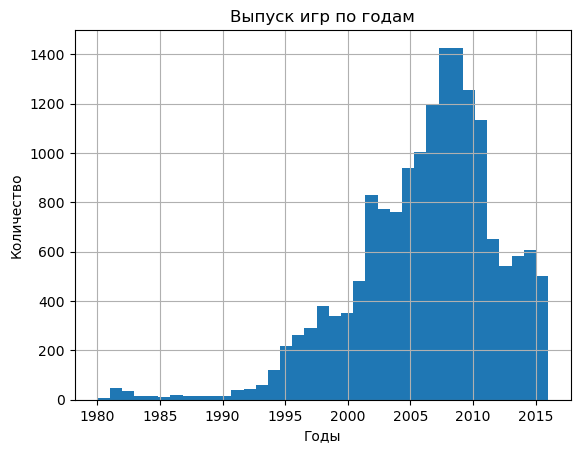

In [27]:
data.hist('year_of_release', bins = 37, range = (1980, 2016))
plt.title('Выпуск игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество')

Вместе с развитием технологий, начиная с середины 90х пошел резкий рост рынка компьютерных игр. В этот период появлялись новые жанры, появилась первая гоночная игра в 3D формате, интерес к компьютерным играм был огромен. В 1994 г. появилась игра Need for Speed, ставшая одной из самых успешных серий игр в целом. Все это сказывалось на росте данного рынка. 
Основные годы выпуска игр пришлись на 2005-2010 г. Спад после 2010 г можно связать с тем, что с развитием общедоступного и скоростного интернета интерес пользователей сместился на общение в сети. 

count    16443.000000
mean      2006.487563
std          5.873314
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

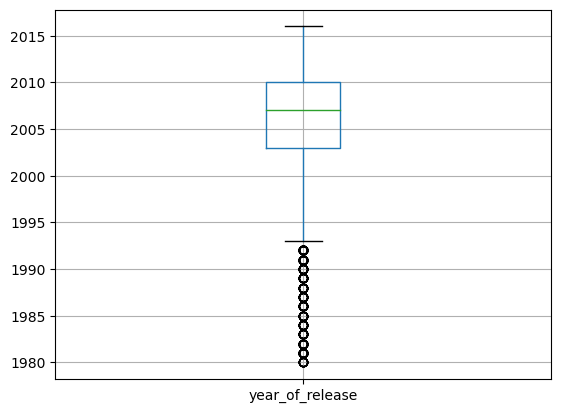

In [28]:
# Построим диаграмму размаха
data.boxplot('year_of_release')
data['year_of_release'].describe()

В построенной диаграмме размаха видно, что нижний "ус" упирается в 1993 год, что считается границей нормального размаха. Это значит, что до 1993 г было выпущено крайне мало игр, то есть годами до 1993 г можно пренебречь.

#### Продажи по платформам

Text(0, 0.5, 'Миллионы проданных копий')

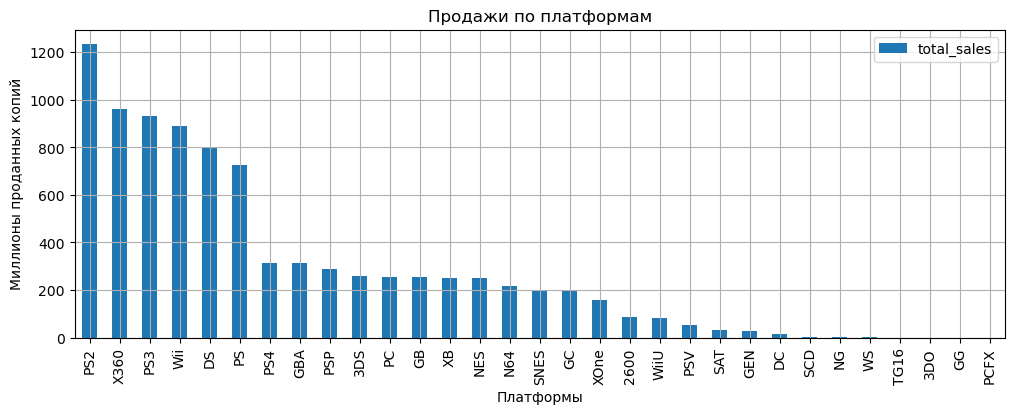

In [29]:
# Построим график зависимости суммарных общих продаж в зависимости от платформы
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)\
                 .plot(kind='bar', grid=True, figsize=(12,4))
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')

Text(0, 0.5, 'Миллионы проданных копий')

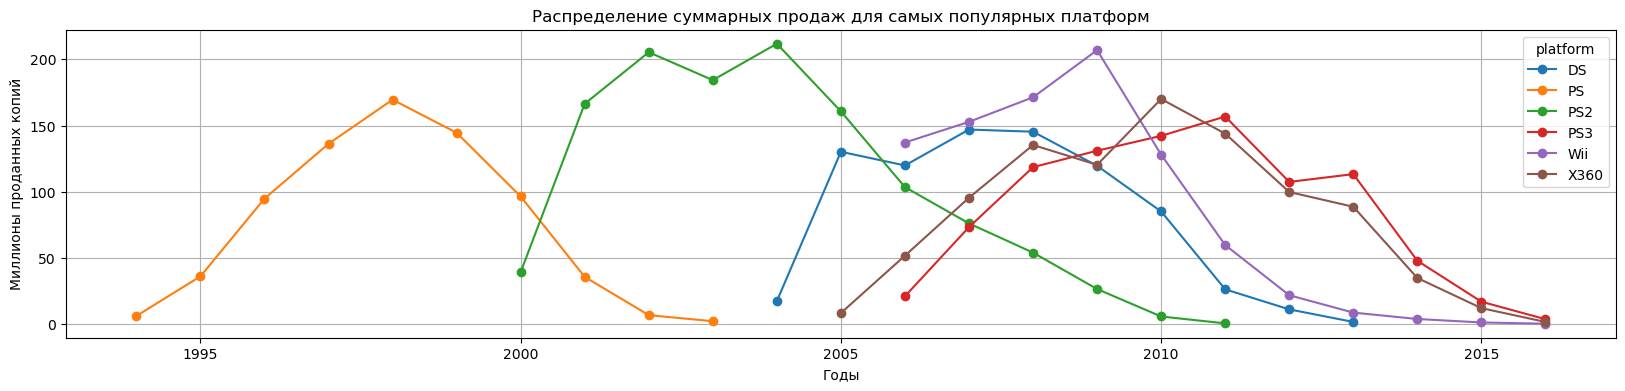

In [30]:
# Построим распределение суммарных продаж по годам для самых популярных платформ
data_top_platforms = data.loc[(data['platform'] == 'PS2') | (data['platform'] == 'X360') | (data['platform'] == 'PS3')\
                              | (data['platform'] == 'Wii') | (data['platform'] == 'DS') | (data['platform'] == 'PS')]
data_top_platforms = data_top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales',\
                                                    aggfunc='sum').plot(style='o-', grid=True, figsize=(20,4))
plt.title('Распределение суммарных продаж для самых популярных платформ')
plt.xlabel('Годы')
plt.ylabel('Миллионы проданных копий')

По данному распределению мы видим, что самой старейшей и популярной платформой является PS. До 2004 г эта платформа была монополистом на рынке, меняя лишь серию (PS, PS2 итп). Но в 2004-2006 гг появились крупные конкуренты (X360, Wii, DS).

Также по графику видим, что жизненный цикл платформы составляет в среднем 10 лет.

Для того, чтобы можно было построить прогноз на 2017 год, возьмем не слишком большой период (2013-2016 гг), чтобы не исказить результаты отжившими трендами (например, PS, PS2).

In [31]:
data_actual = data.loc[(data['year_of_release'] > 2012)]
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


In [32]:
# Рассмотрим продажи по платформам за этот период
data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
        .sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [33]:
# Рассмотрим продажи по платформам за 2016
data.loc[(data['year_of_release'] == 2016)].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
        .sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


In [34]:
# Построим распределение суммарных продаж по актуальному периоду для топ перспективных платформ
data_actual_top_platforms = data_actual.loc[(data['platform'] == 'PS4') | (data['platform'] == 'XOne') | (data['platform'] ==\
                                                                                                          '3DS')\
                              | (data['platform'] == 'PC') | (data['platform'] == 'WiiU')]

Text(0, 0.5, 'Миллионы проданных копий')

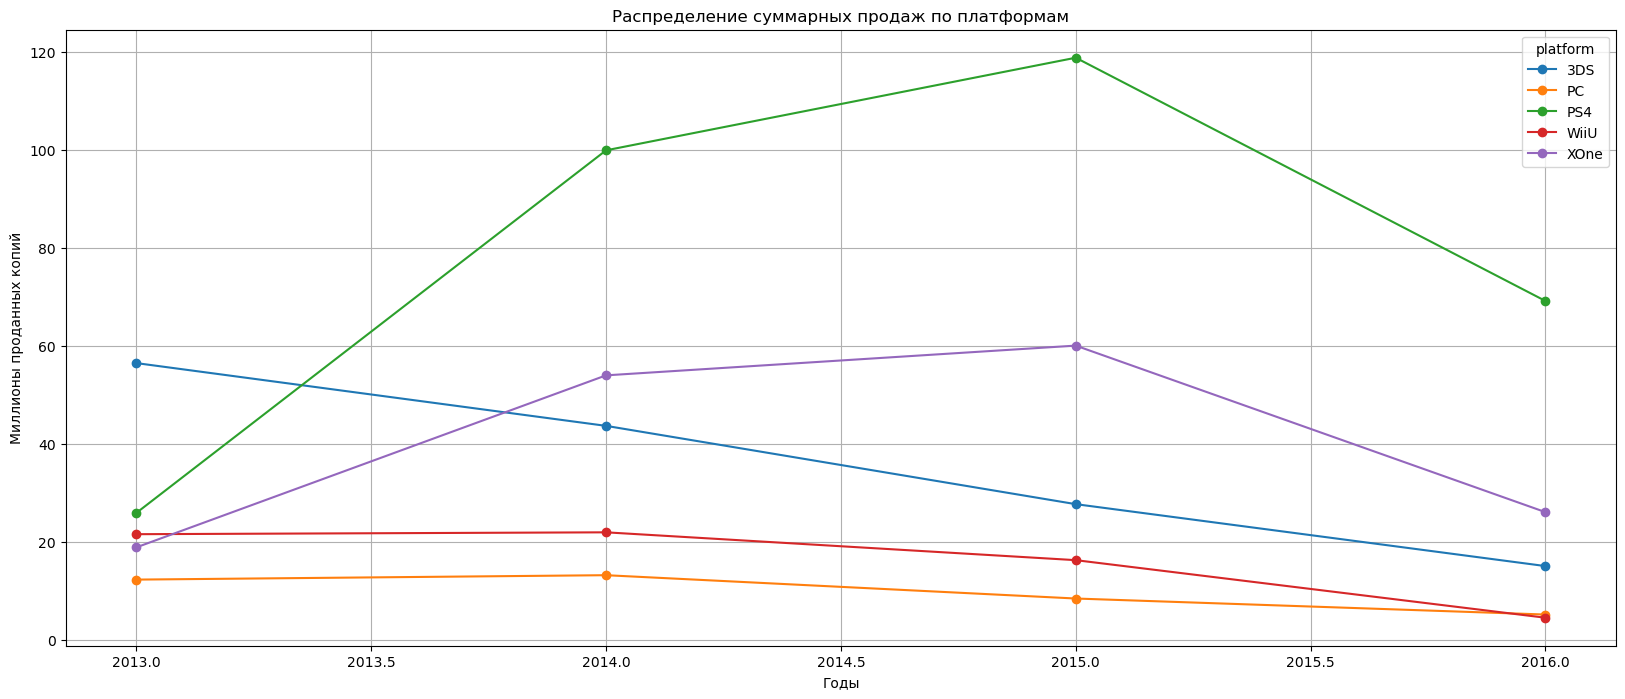

In [35]:
data_actual_top_platforms.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(style='o-', grid=True, figsize=(20,8))

plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Годы')
plt.ylabel('Миллионы проданных копий')

На основании данных о продажах за 2013-2016 г и распределений по годам можно сделать вывод, что к 2017 году закончит свое существование четверка платформ, которая лидировала в период с 2006 по 2016 г (X360, PS3, Wii, DS). При этом на смену PS3 придет PS4, на смену DS - 3DS, а на смену X360 - XOne.

В 2016 г наиболее прибыльными платформами были PS4, XOne, 3DS. Вероятно, они и останутся наиболее прибыльными платформами в 2017 году. Хотя пиковые значения их жизненногого цикла уже прошли, можно ожидать, что до 2018 года они еще будут приносить прибыль. Также в топ-5 попадают платформы WiiU (замена Wii) и PC (персональный компьютер, занимающий свою небольшую нишу).

(0.0, 5.0)

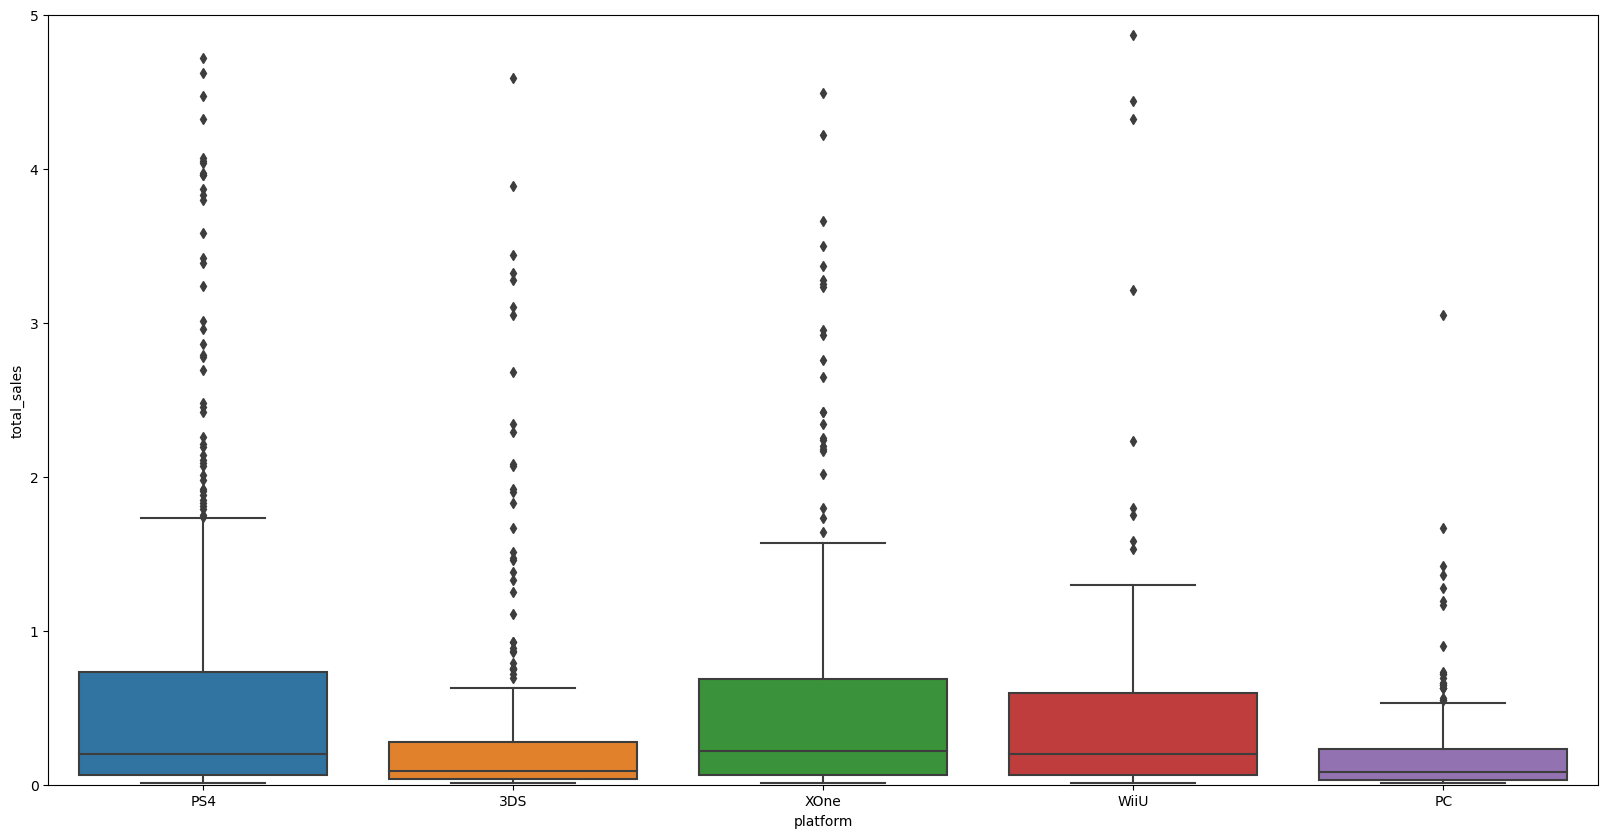

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x='platform', y='total_sales', data=data_actual_top_platforms)
plt.ylim(0,5)

По построенным диаграммам размаха видно, что у некоторых есть большое количество выбросов. Это обозначает, что распределение игр по продажам для одной платформы неравномерно: на платформе может быть много игр, но огромную популярность приобретают единицы, которые и определяют общие объемы продаж.

Таким образом, вероятно, что на платформах PS4, 3DS, XOne представлены бестселлеры, которые и задают высокий уровень продаж. При этом медианы в коробках заметно меньше средних значений, т.е. на этих платформах есть немало игр с гораздо меньшими продажами, чем у бестселлеров.

А вот в диаграммах для WiiU и PC видим гораздо меньше выбросов. Очевидно, на этих платформах объемы продаж различных игр распределены более-менее равномерно. 

#### Взаимосвязь между отзывами и продажами

Для исследования взаимосвязи между отзывами и продажами исключим строки с маркерами в столбцах `critic_score` и `user_score`. Здесь не будем ограничиваться срезом топ-5 перспективных платформ, так как и так отфильтруем много строк с маркерами. Посмотрим, данные по каким платформам у нас останутся в наличии после такой фильтрации.

In [37]:
data_filtered = data_actual.loc[~((data_actual['critic_score'] == 1000) | (data_actual['user_score'] == 1000))]
data_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,244.27
XOne,130.21
PS3,114.06
X360,85.27
WiiU,51.23
3DS,40.10
PC,34.79
PSV,13.88
PSP,0.15


In [38]:
# Посмотрим среднюю оценку по платформам
data_filtered.groupby('platform')[['user_score', 'critic_score']].agg('mean')

,user_score,critic_score
platform,,
3DS,7.195522,69.149254
PC,6.302027,75.601351
PS3,6.625833,70.466667
PS4,6.749799,72.132530
PSP,8.300000,74.000000
PSV,7.782895,71.657895
WiiU,7.213043,71.579710
X360,6.301235,69.234568
XOne,6.538182,73.618182


Средняя оценка пользователя находится в пределах 6.3-8.3, критиков - 69-75. На первый взгляд, зависимости от продаж не наблюдается. Рассмотрим корреляцию для перспективных платформ PS4, XOne, WiiU.

Text(0.5, 1.0, 'Диаграмма рассеивания для PS4 (общие продажи/оценка критиков)')

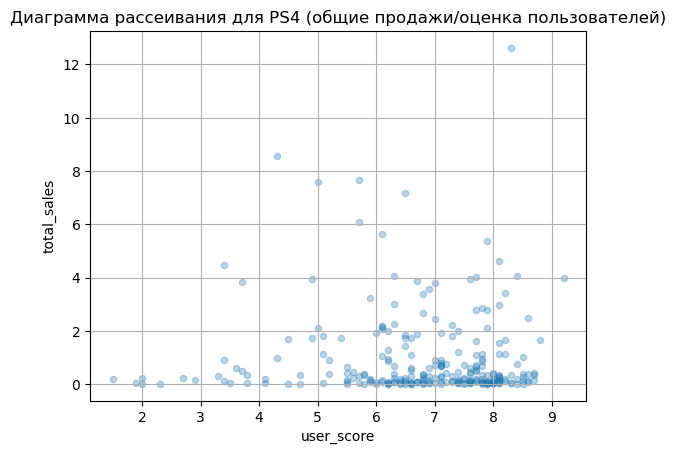

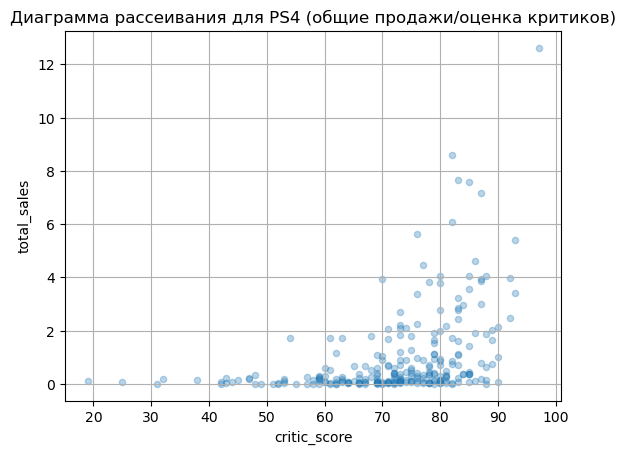

In [39]:
data_filtered.loc[data_filtered['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,\
                                                           grid=True)
plt.title('Диаграмма рассеивания для PS4 (общие продажи/оценка пользователей)')
data_filtered.loc[data_filtered['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,\
                                                           grid=True)
plt.title('Диаграмма рассеивания для PS4 (общие продажи/оценка критиков)')

In [40]:
print('Коэффициент Пирсона для PS4 (общие продажи/оценка пользователей):', data_filtered.loc[data_filtered['platform'] ==\
                             'PS4']['total_sales'].corr(data_filtered.loc[data_filtered['platform'] == 'PS4']['user_score']))
print('Коэффициент Пирсона для PS4  (общие продажи/оценка критиков):', data_filtered.loc[data_filtered['platform'] == 'PS4']\
      ['total_sales'].corr(data_filtered.loc[data_filtered['platform'] == 'PS4']['critic_score']))

Коэффициент Пирсона для PS4 (общие продажи/оценка пользователей): -0.03362497596528881
Коэффициент Пирсона для PS4  (общие продажи/оценка критиков): 0.40589480145836637


Text(0.5, 1.0, 'Диаграмма рассеивания для XOne (общие продажи/оценка критиков)')

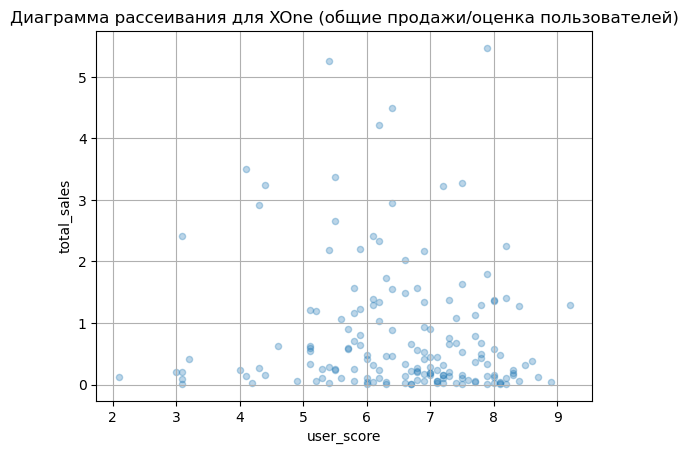

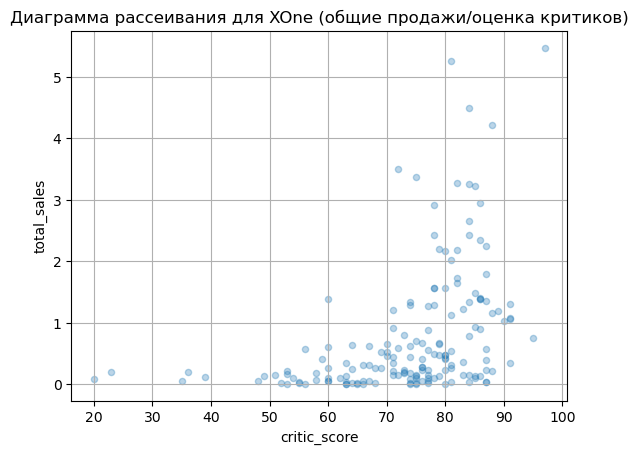

In [41]:
data_filtered.loc[data_filtered['platform'] == 'XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,\
                                                            grid=True)
plt.title('Диаграмма рассеивания для XOne (общие продажи/оценка пользователей)')
data_filtered.loc[data_filtered['platform'] == 'XOne'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,\
                                                            grid=True)
plt.title('Диаграмма рассеивания для XOne (общие продажи/оценка критиков)')

In [42]:
print('Коэффициент Пирсона для XOne (общие продажи/оценка пользователей):', data_filtered.loc[data_filtered['platform'] ==\
                            'XOne']['total_sales'].corr(data_filtered.loc[data_filtered['platform'] == 'XOne']['user_score']))
print('Коэффициент Пирсона для XOne  (общие продажи/оценка критиков):', data_filtered.loc[data_filtered['platform'] == 'XOne']\
      ['total_sales'].corr(data_filtered.loc[data_filtered['platform'] == 'XOne']['critic_score']))

Коэффициент Пирсона для XOne (общие продажи/оценка пользователей): -0.09400318326920865
Коэффициент Пирсона для XOne  (общие продажи/оценка критиков): 0.410422035612964


Text(0.5, 1.0, 'Диаграмма рассеивания для WiiU (общие продажи/оценка критиков)')

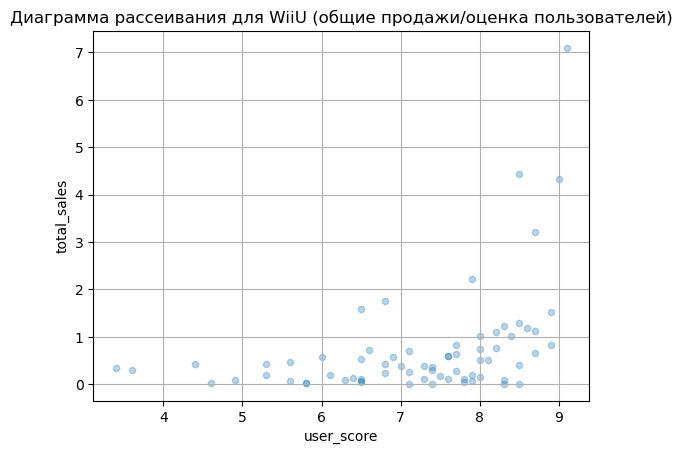

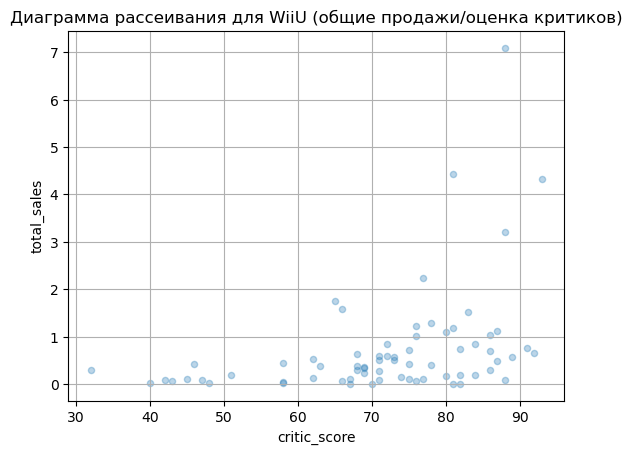

In [43]:
data_filtered.loc[data_filtered['platform'] == 'WiiU'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,\
                                                            grid=True)
plt.title('Диаграмма рассеивания для WiiU (общие продажи/оценка пользователей)')
data_filtered.loc[data_filtered['platform'] == 'WiiU'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,\
                                                            grid=True)
plt.title('Диаграмма рассеивания для WiiU (общие продажи/оценка критиков)')

In [44]:
print('Коэффициент Пирсона для WiiU (общие продажи/оценка пользователей):', data_filtered.loc[data_filtered['platform'] ==\
                        'WiiU']['total_sales'].corr(data_filtered.loc[data_filtered['platform'] == 'WiiU']['user_score']))
print('Коэффициент Пирсона для WiiU  (общие продажи/оценка критиков):', data_filtered.loc[data_filtered['platform'] == 'WiiU']\
      ['total_sales'].corr(data_filtered.loc[data_filtered['platform'] == 'WiiU']['critic_score']))

Коэффициент Пирсона для WiiU (общие продажи/оценка пользователей): 0.40869174384926504
Коэффициент Пирсона для WiiU  (общие продажи/оценка критиков): 0.3795044989978416


Для платформ PS4 и XOne взаимосвязи между продажами и оценками пользователей не наблюдается, об этом говорит коэффициент Пирсона близкий к 0. Но можно сказать, что есть некоторая прямая взаимосвязь между продажами и оценками критиков, но она не сильная. Коэффициент Пирсона между продажами и оценками пользователей для платформы WiiU тоже показывает небольшую взаимосвязь.

#### Распределение по жанрам

Text(0, 0.5, 'Жанры')

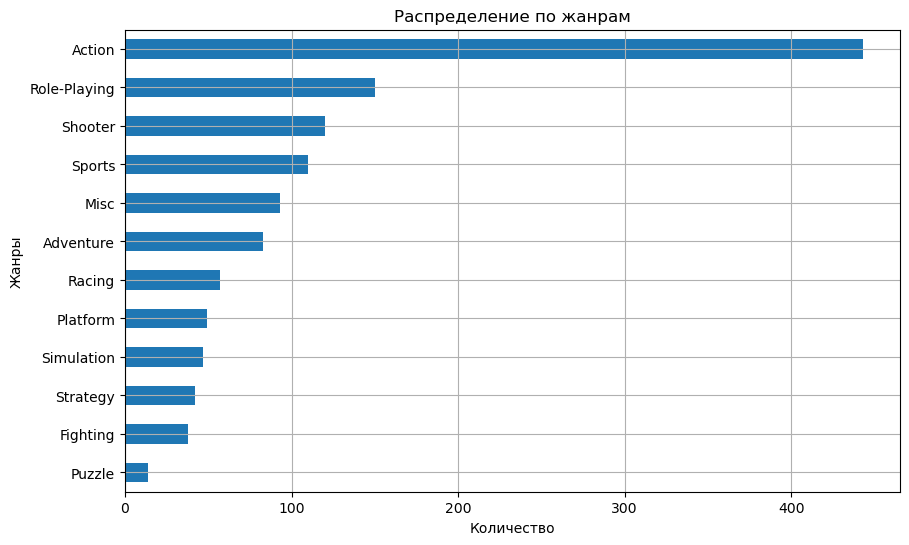

In [45]:
# Частота встречаемости жанров
data_actual_top_platforms['genre'].value_counts(ascending=True).plot(y='city', kind='barh', grid=True, figsize=(10,6))
plt.title('Распределение по жанрам')
plt.xlabel('Количество')
plt.ylabel('Жанры')

Text(0, 0.5, 'Жанры')

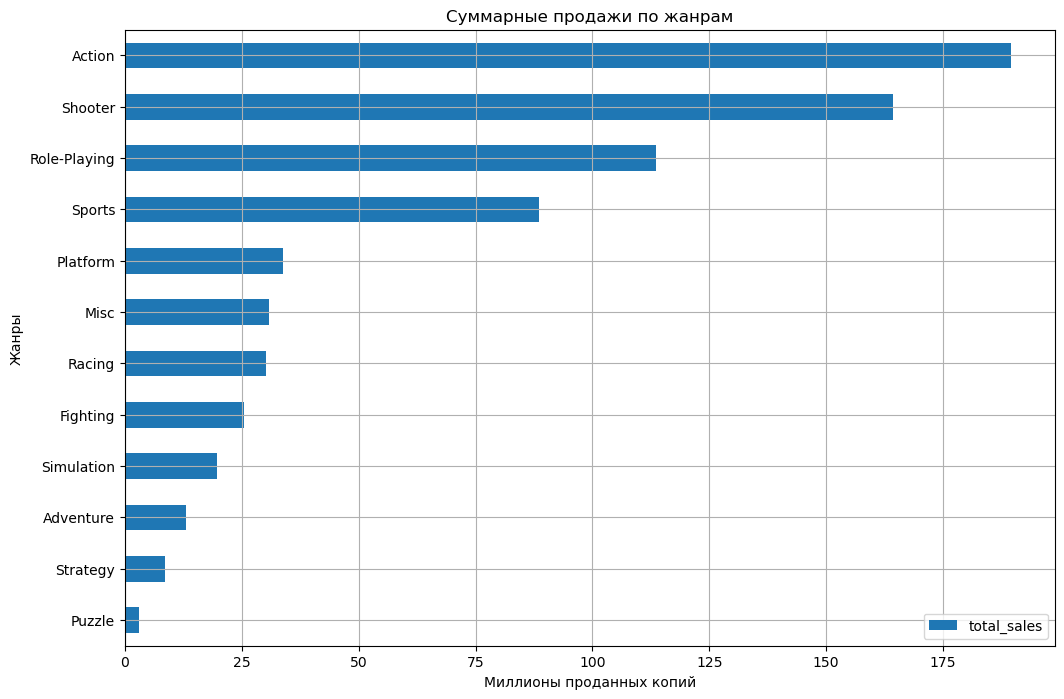

In [46]:
# Суммарные продажи по жанрам
data_actual_top_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=True).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Жанры')

In [47]:
# Посмотрим на медианные значения продаж
data_actual_top_platforms.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales',\
                                                                                                         ascending=False)

,total_sales
genre,
Shooter,0.495
Sports,0.275
Platform,0.260
Role-Playing,0.190
Fighting,0.155
Misc,0.120
Racing,0.120
Action,0.110
Simulation,0.100


Наиболее встречаемым жанром является Action. Лидерами по суммарным продажам являются Action, Shooter и Role-Playing. При этом медианное значение продаж выше всего у игр с жанром Shooter. Меньше всего продаж у игр с жанрами Strategy и Puzzle.

Отдельно можно выделить Adventure - весьма популярный жанр, но не имеющий больших суммарных продаж.

Скорее всего, игры в жанре Action являются одними из самых прибыльных. Но на основании имеющихся данных мы не можем это утверждать. Ведь затраты на производство качественной игры в таком жанре не сравнимо выше затрат на производство игры в жанре, например, Puzzle. 

**Выводы**

- Вместе с развитием технологий, начиная с середины 90х пошел резкий рост рынка компьютерных игр. Основные годы выпуска игр пришлись на 2005-2010 г. Самой старейшей и популярной платформой является PS. До 2004 г эта платформа была монополистом на рынке, меняя лишь серию (PS, PS2 итп). Но в 2004-2006 гг появились крупные конкуренты (X360, Wii, DS). Жизненный цикл платформы составляет в среднем 10 лет.

- Для того, чтобы можно было построить прогноз на 2017 год, возьмем не слишком большой период (2013-2016 гг), чтобы не исказить результаты отжившими трендами (например, PS, PS2).

- На основании данных о продажах за 2006-2016 г и распределений по годам можно сделать вывод, что к 2017 году закончит свое существование четверка платформ, которая лидировала в период с 2006 по 2016 г (X360, PS3, Wii, DS). При этом на смену PS3 придет PS4, на смену DS - 3DS, а на смену X360 - XOne.

- В 2016 г наиболее прибыльными платформами были PS4, XOne, 3DS. Вероятно, они и останутся наиболее прибыльными платформами в 2017 году. Хотя пиковые значения их жизненногого цикла уже прошли, можно ожидать, что до 2018 года они еще будут приносить прибыль. Также в топ-5 попадают платформы WiiU (замена Wii) и PC (персональный компьютер, занимающий свою небольшую нишу).

- У самых перспективных платформ PS4, 3DS, XOne однотипные диграммы размаха с большим количеством выбросов. Вероятно, на этих платформах представлены бестселлеры, которые и задают высокий уровень продаж. 

- В диаграммах для WiiU и PC гораздо меньше выбросов. Очевидно, на этих платформах объемы продаж различных игр распределены более-менее равномерно. 

- Для платформ PS4 и XOne взаимосвязи между продажами и оценками пользователей не наблюдается, об этом говорит коэффициент Пирсона близкий к 0. Но можно сказать, что есть некоторая прямая взаимосвязь между продажами и оценками критиков, но она не сильная. Коэффициент Пирсона между продажами и оценками пользователей для платформы WiiU тоже показывает небольшую взаимосвязь.

- Самыми продаваемыми жанрами являются Action, Shooter и Role-Playing (медианное значение выше всего у жанра Role-Playing). Меньше всего продаж у игр с жанрами Strategy и Puzzle. Отдельно можно выделить Adventure - весьма популярный жанр, но не имеющий больших суммарных продаж.

### Портрет пользователя по регионам (NA, EU, JP)

#### Самые популярные платформы (топ-5) по регионам

,na_sales,na_share
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272
WiiU,29.21,0.066734
PC,11.11,0.025382
Wii,6.56,0.014987
PSV,5.04,0.011514


Text(0, 0.5, 'Миллионы проданных копий')

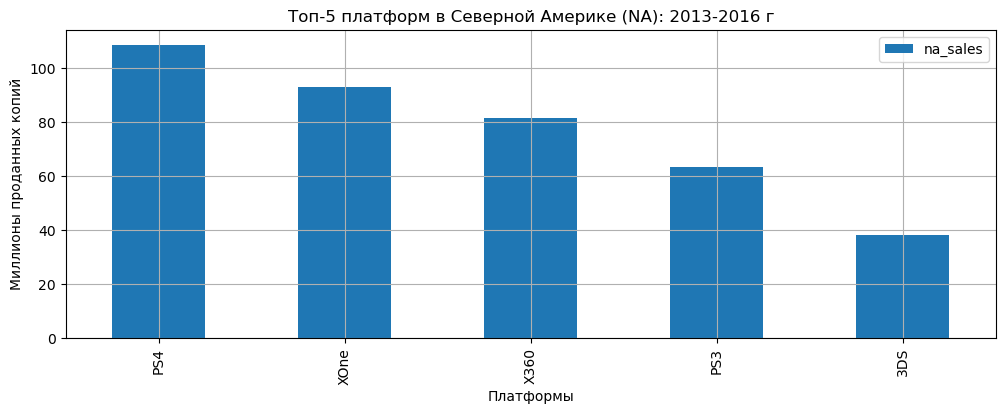

In [48]:
# Сводная таблица продаж по платформам в Северной Америке (NA)
data_actual_na = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)
data_actual_na['na_share']= data_actual_na['na_sales']/data_actual_na['na_sales'].sum()
display(data_actual_na)

# Построим график зависимости суммарных продаж в NA в зависимости от платформы (за период 2013-2016 г)
data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head().plot(kind='bar', grid=True, figsize=(12,4))

plt.title('Топ-5 платформ в Северной Америке (NA): 2013-2016 г')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')

,eu_sales,eu_share
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933
PC,25.36,0.064656
WiiU,19.85,0.050608
PSV,6.10,0.015552
Wii,5.93,0.015119


Text(0, 0.5, 'Миллионы проданных копий')

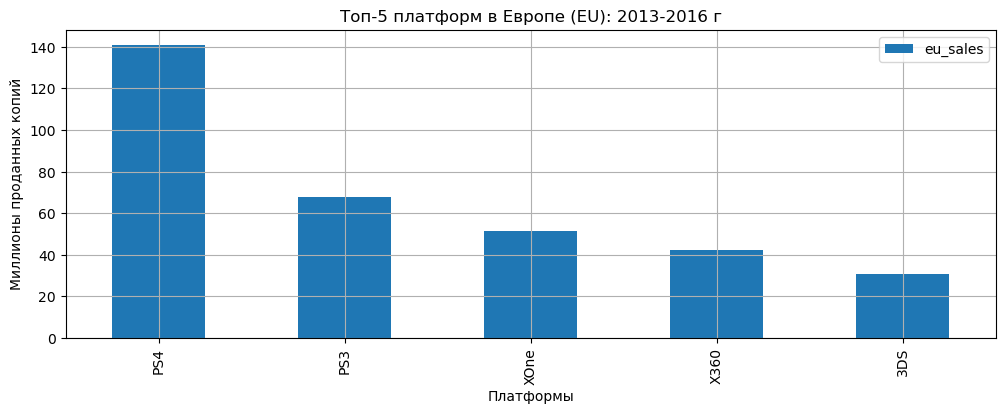

In [49]:
# Сводная таблица продаж по платформам в Европе (EU)
data_actual_eu = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)
data_actual_eu['eu_share']= data_actual_eu['eu_sales']/data_actual_eu['eu_sales'].sum()
display(data_actual_eu)

# Построим график зависимости суммарных продаж в EU в зависимости от платформы (за период 2013-2016 г)
data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', grid=True, figsize=(12,4))

plt.title('Топ-5 платформ в Европе (EU): 2013-2016 г')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')

,jp_sales,jp_share
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284
PSP,3.29,0.023370
X360,0.51,0.003623
XOne,0.34,0.002415
Wii,0.05,0.000355


Text(0, 0.5, 'Миллионы проданных копий')

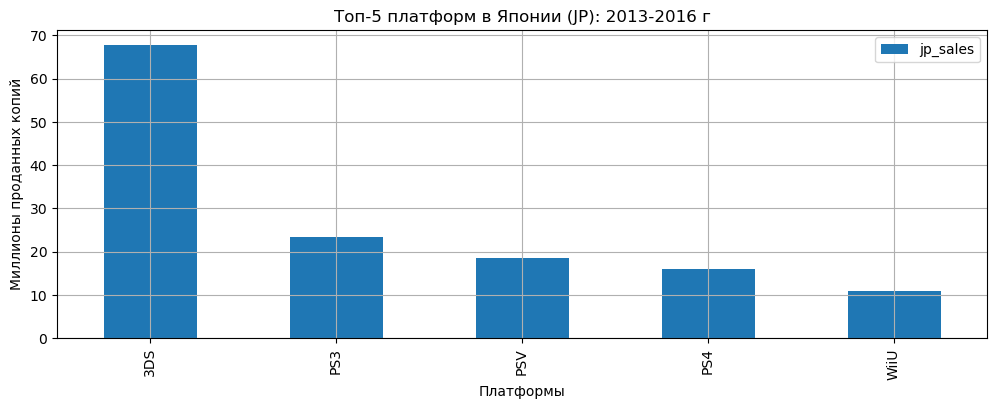

In [50]:
# Сводная таблица продаж по платформам в Японии (JP)
data_actual_jp = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
data_actual_jp['jp_share']= data_actual_jp['jp_sales']/data_actual_jp['jp_sales'].sum()
display(data_actual_jp)

# Построим график зависимости суммарных продаж в JP в зависимости от платформы (за период 2013-2016 г)
data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', grid=True, figsize=(12,4))

plt.title('Топ-5 платформ в Японии (JP): 2013-2016 г')
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')

В Северной Америке предпочтение отдается платформам компании Microsoft (XOne + X360 составляет около 40% продаж) и Sony (PS3 + PS4 составляет около 38% продаж). 

В Европе с большим отрывом лидируют платформы компании Sony (доля продаж PS3 + PS4 около 53%). Доля продаж XOne + X360 составляет около 24%.

В Японии безоговорочным лидером является платформа 3DS японской компании Nintendo (около 48%). Ближайшим конкурентом можно назвать платформы компании Sony (PS3 + PS4 составляет около 28% продаж).

#### Самые популярные жанры (топ-5) по регионам

Text(0, 0.5, 'Жанры')

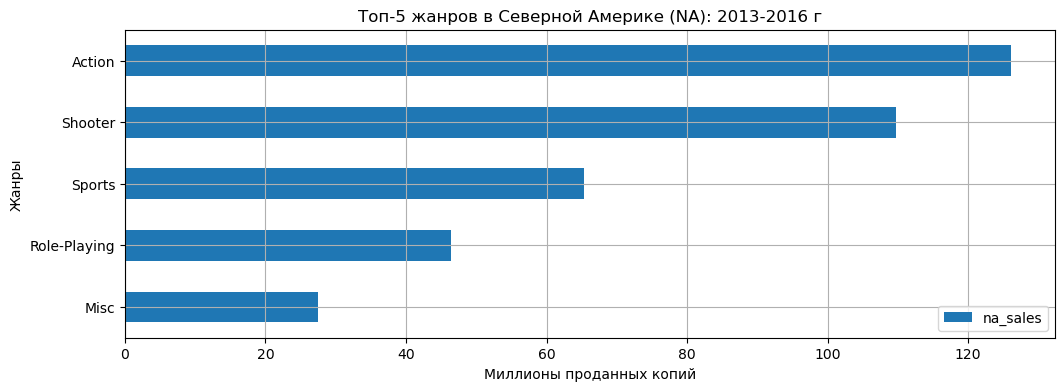

In [51]:
# Построим график зависимости суммарных продаж в NA в зависимости от жанра (за период 2013-2016 г)
data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=True).tail().plot(kind='barh', grid=True, figsize=(12,4))

plt.title('Топ-5 жанров в Северной Америке (NA): 2013-2016 г')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Жанры')

Text(0, 0.5, 'Жанры')

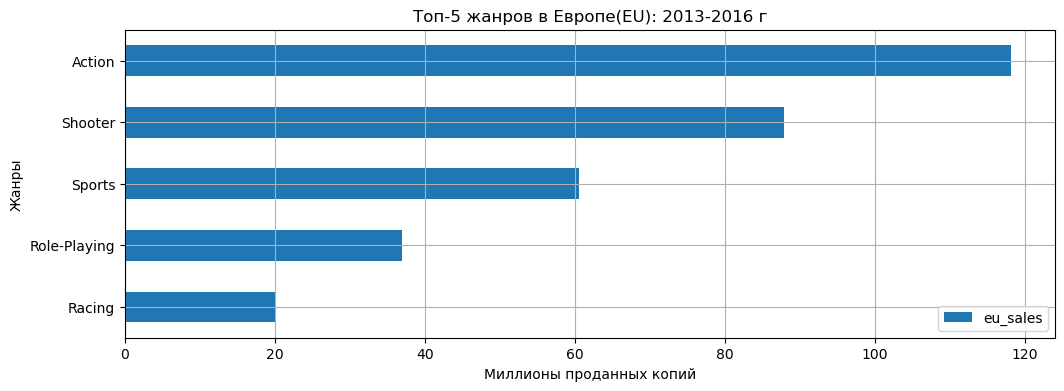

In [52]:
# Построим график зависимости суммарных продаж в EU в зависимости от жанра (за период 2013-2016 г)
data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=True).tail().plot(kind='barh', grid=True, figsize=(12,4))

plt.title('Топ-5 жанров в Европе(EU): 2013-2016 г')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Жанры')

Text(0, 0.5, 'Жанры')

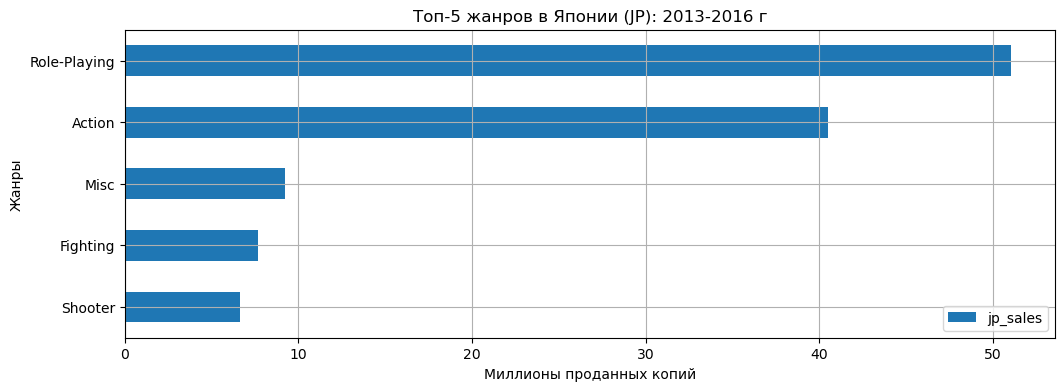

In [53]:
# Построим график зависимости суммарных продаж в JP в зависимости от жанра (за период 2013-2016 г)
data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=True).tail().plot(kind='barh', grid=True, figsize=(12,4))

plt.title('Топ-5 жанров в Японии (JP): 2013-2016 г')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Жанры')

По данным графикам видим, что в Северной Америке и Европе самыми популярными жанрами являются Action и Sports.

В Японии же лидирует жанр Role-Playing, на втором месте Action. Так как в Японии с большим преимуществом лидирует платформа DS, можно сделать вывод, что на этой платформе представлены в основном игры в жанре Role-Playing.

#### Влияние рейтинга ESRB на продажи по регионам

Text(0, 0.5, 'Рейтинг')

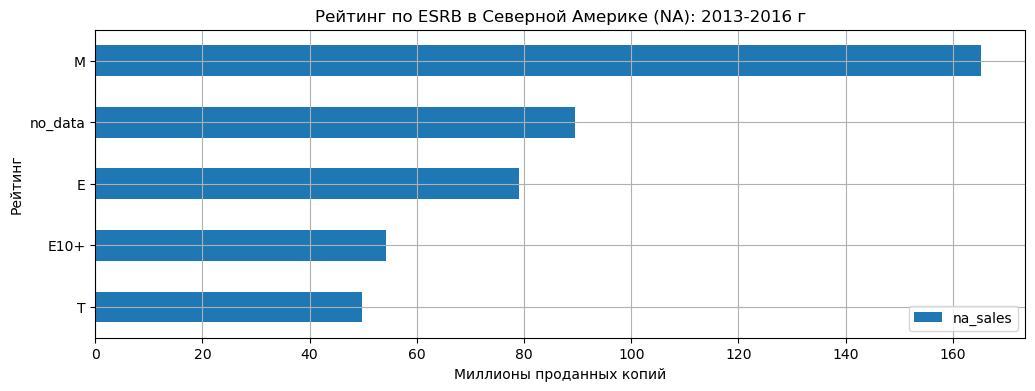

In [54]:
# Рейтинг ESRB в NA
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=True).plot(kind='barh', grid=True, figsize=(12,4))

plt.title('Рейтинг по ESRB в Северной Америке (NA): 2013-2016 г')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Рейтинг')

Text(0, 0.5, 'Рейтинг')

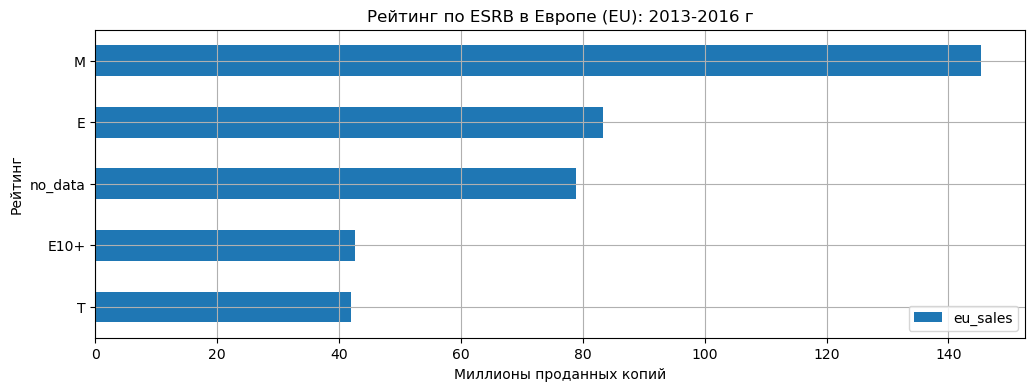

In [55]:
# Рейтинг ESRB в EU
data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=True).plot(kind='barh', grid=True, figsize=(12,4))

plt.title('Рейтинг по ESRB в Европе (EU): 2013-2016 г')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Рейтинг')

Text(0, 0.5, 'Рейтинг')

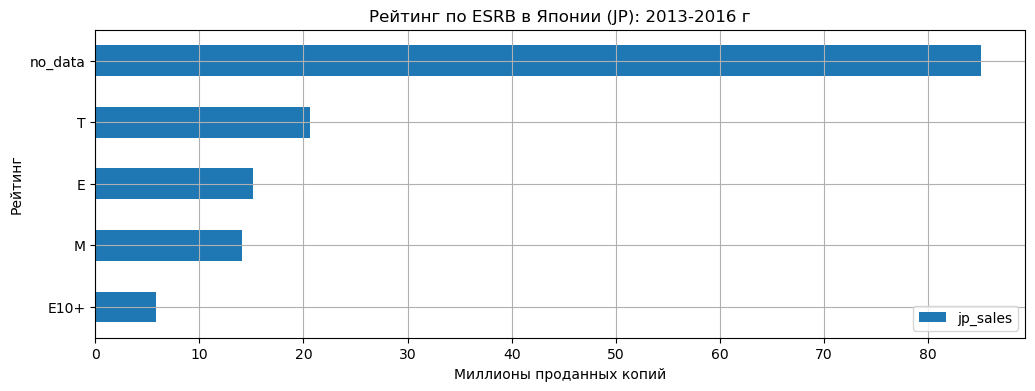

In [56]:
# Рейтинг ESRB в JP
data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=True).plot(kind='barh', grid=True, figsize=(12,4))

plt.title('Рейтинг по ESRB в Японии (JP): 2013-2016 г')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Рейтинг')

По полученным графикам мы видим, что В Северной Америке и Европе наиболее популярные игры имеют рейтинг M(17+).

Система ESRB не используется в Японии. Поэтому, вероятно, игры на японской платформе DS не имеют ретинга по ESRB, что и показывает график.

**Выводы**

- В Северной Америке предпочтение отдается платформам компании Microsoft (XOne + X360 составляет около 40% продаж) и Sony (PS3 + PS4 составляет около 38% продаж). Самыми популярными жанрами являются Action и Shooter.

- В Европе с большим отрывом лидируют платформы компании Sony (доля продаж PS3 + PS4 около 53%). Доля продаж XOne + X360 составляет около 24%. Самыми популярными жанрами являются Action и Shooter.

- В Японии безоговорочным лидером является платформа 3DS японской компании Nintendo (около 48%). Ближайшим конкурентом можно назвать платформы компании Sony (PS3 + PS4 составляет около 28% продаж). Самыми популярными жанрами являются Role-Playing и Action.

- В Северной Америке и Европе наиболее популярные игры имеют рейтинг M(17+). В Японии система ESRB не применяется, поэтому, вероятно, игры на японской платформе DS не имеют ретинга по ESRB.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:**
- H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:**
- Н1 - средние пользовательские рейтинги платформ Xbox One и PC разные.

Пороговое значение - 5%

Для проверки данной гипотезы возьмем данные за весь период и отбросим маркеры со значением 1000 в столбце `user_score`.

In [57]:
data_user_score = data.loc[~(data['user_score'] == 1000)]
data_XOne = data_user_score.loc[data_user_score['platform'] == 'XOne']
data_XOne = data_XOne['user_score']

data_PC = data_user_score.loc[data_user_score['platform'] == 'PC']
data_PC = data_PC['user_score']

alpha = 0.05
results = st.ttest_ind(data_XOne, data_PC)
print ('P-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

P-value: 1.3037979620149106e-05
Отвергаем Н0


In [58]:
# Средний пользовательский рейтинг платформ XOne и PC
print(data_XOne.mean())
print(data_PC.mean())

6.521428571428572
7.065960264900661


**Вывод**: отвергаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, так как полученное значение p-value ниже заданного уровня значимости. Даже если взять более низкий общепринятый порог значимости (1%), то p-value все равно был бы гораздо ниже.  

Есть все основания говорить, что рейтинги у данных платформ различны. Дополнительно подтверждаем, что средний пользовательский рейтинг платформы XOne ниже, чем у PC (6,5 против 7,1).

#### Средние пользовательские рейтинги жанров Action и Sports разные

В нулевой гипотезе принято использовать знак равенства. Поэтому сформулируем ее так:

**Нулевая гипотеза:**
- H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:**
- Н1 - средние пользовательские рейтинги жанров Action и Sports разные.

Пороговое значение - 5%

Для проверки данной гипотезы тоже берем данные за весь период с отброшенными маркерами (1000) в столбце `user_score`.

In [59]:
data_action = data_user_score.loc[data_user_score['genre'] == 'Action']
data_action = data_action['user_score']

data_sports = data_user_score.loc[data_user_score['genre'] == 'Sports']
data_sports = data_sports['user_score']

alpha = 0.05
results = st.ttest_ind(data_action, data_sports)
print ('P-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

P-value: 0.06480928064420527
Не отвергаем Н0


In [60]:
# Средний пользовательский рейтинг жанров Action и Sports
print(data_action.mean())
print(data_sports.mean())

7.058129175946549
6.951433857539316


**Вывод**: не отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, так как полученное значение p-value превышает заданный уровень значимости. Cредний рейтинг жанра Action статистически значимо не отличается от среднего рейтинга жанра Sports.

### Общий вывод

**Выполнена предобработка данных:**

- Заменены названия столбцов.

- Обработаны пропуски и выбросы.
- Скорректированы типы данных.

- Добавлен столбец `total_sales` с суммарными продажами по всем регионам.


**Проведен исследовательский анализ данных:**

- Основные годы выпуска игр пришлись на 2005-2010 г. Самой старейшей и популярной платформой является PS. До 2004 г эта платформа была монополистом на рынке, меняя лишь серию (PS, PS2 итп). Но в 2004-2006 гг появились крупные конкуренты (X360, Wii, DS). Жизненный цикл платформы составляет в среднем 10 лет.

- Предполагаем, что перспективными платформами в 2017 г будут PS4, XOne, 3DS. Хотя пиковые значения их жизненногого цикла уже прошли, можно ожидать, что до 2018 года они еще будут приносить прибыль. Также в топ-5 попадают платформы WiiU (замена Wii) и PC (персональный компьютер, занимающий свою небольшую нишу).

- У самых перспективных платформ PS4, 3DS, XOne однотипные диграммы размаха с большим количеством выбросов. Вероятно, на этих платформах представлены бестселлеры, которые и задают высокий уровень продаж. 

- В диаграммах для WiiU и PC гораздо меньше выбросов. Очевидно, на этих платформах объемы продаж различных игр распределены более-менее равномерно. 

- Для платформ PS4 и XOne взаимосвязи между продажами и оценками пользователей не наблюдается, об этом говорит коэффициент Пирсона близкий к 0. А вот для платформы WiiU коэффициент Пирсона между продажами и оценками пользователей показывает небольшую взаимосвязь. Так же для всех платформ наблюдается некоторая прямая взаимосвязь между продажами и оценками критиков.

- Самыми продаваемыми жанрами являются Action, Shooter и Role-Playing (медианное значение выше всего у жанра Role-Playing). Меньше всего продаж у игр с жанрами Strategy и Puzzle. Отдельно можно выделить Adventure - весьма популярный жанр, но не имеющий больших суммарных продаж.


**Исследованы продажи по регионам (NA, EU, JP):**

- В Северной Америке предпочтение отдается платформам компании Microsoft (XOne + X360 составляет около 40% продаж) и Sony (PS3 + PS4 составляет около 38% продаж). Самыми популярными жанрами являются Action и Shooter.

- В Европе с большим отрывом лидируют платформы компании Sony (доля продаж PS3 + PS4 около 53%). Доля продаж XOne + X360 составляет около 24%. Самыми популярными жанрами являются Action и Shooter.

- В Японии безоговорочным лидером является платформа 3DS японской компании Nintendo (около 48%). Ближайшим конкурентом можно назвать платформы компании Sony (PS3 + PS4 составляет около 28% продаж). Самыми популярными жанрами являются Role-Playing и Action.

- В Северной Америке и Европе наиболее популярные игры имеют рейтинг M(17+). В Японии система ESRB не применяется, поэтому, вероятно, игры на японской платформе DS не имеют ретинга по ESRB.

**Проверены гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC разные.
- Не можем утверждать, что средние пользовательские рейтинги жанров Action и Sports разные. Cредний рейтинг жанра Action статистически значимо не отличается от среднего рейтинга жанра Sports.

**Рекомендации:**

В 2017 г. для каждого региона следует проводить свои маркетинговые кампании, ориентированные на популярные продукты именно на этом рынке: 
- В Северной Америке будут популярны игры в жанрах Action и Shooter на платформах PS4 и XOne (которые окончательно заменят PS3 и X360 соответственно).
- В Европе будут наиболее популярны игры в жанрах Action и Shooter на платформе XOne (замена X360).
- В Японии будут популярны игры в жанре Role-Playing на платформе 3DS (замена DS).